# Parcial Primer Corte Fisica Computacional

Describir el movimiento de un pendulo de masa $m$ de longitud $l$ que esta atado a una masa $M$ sin friccion y bajo la fuerza de la gravedad $g$. La masa $M$ solo se mueve en el eje posición $x$.

## Solucion Analitica

En primer lugar, vamos a definir las posciones de las masas, de esta forma:

\begin{equation}
    {x}'=x+lsin\theta\\
    {y}'=lcos\theta \\
    x=x
\end{equation}

Donde las coordenadas primadas describen la posición de la masa colgante y las no primadas de la masa faltante.

A partir de aqui, encontramos la energia cinetica y potencial de las masas, estas son:

\begin{equation}
    T=\frac{1}{2}\left ( {\dot{x}}'^{2}+{\dot{y}}'^{2} \right )+\frac{1}{2}M\dot{x}^{2}\\
    T=\frac{1}{2}\left [ \dot{x}^{2}+2\dot{x}\dot{\theta}lcos\theta+l^{2}\theta^{2} \right ]+\frac{1}{2}M\dot{x}^{2}
\end{equation}
<br><br>
\begin{equation}
   U=-mg{y}'\\
   U=-mglcos\theta
\end{equation}

A continuación encontraremos el Lagrangiano, de la forma
\begin{equation}
   L=T-U\\
   L=\frac{1}{2}\left ( m+M \right )\dot{x}^{2}+lm\dot{x}\dot{\theta}cos\theta+\frac{1}{2}ml^{2}\dot{\theta}^{2}+mlcos\theta g
\end{equation}

Ahora usaremos las ecuacion de Euler-Lagrange para encontrar las ecuaciones que describen el movimiento del problema. Estas son de la forma.

\begin{equation}
   \frac{d}{dt}\left ( \frac{\partial L}{\partial \dot{q_{i}}} \right )-\frac{\partial L}{\partial q_{i}}
\end{equation}

Una vez apliquemos esta ecuación para nuestras coordenadas $\theta$ y $x$, obtendremos las siguientes ecuaciones de movimiento.

\begin{equation}
   \ddot{\theta}=-\frac{g}{l}sin\theta-\ddot{x}\frac{cos\theta}{l}\\
   \ddot{x}=\frac{m\dot{\theta}^{2}lsin\theta -m\ddot{\theta}lcos\theta}{m+M}
\end{equation}

## Simulación del Problema

Para lograr simular el movimiento que describe nuestra configuracion de pendulo y masa, es necesario desacoplar una de las ecuaciones encontradas, ya que usaremos el comando "odeint" para solucionar las ecuaciones diferenciales y posteriormente mostrar una animación en 3d de las masas.
La ecuación desacopalada es:

\begin{equation}
   \ddot{\theta}=\frac{\frac{-g}{l}sin\theta -\frac{m}{m+M}\dot{\theta}^{2}sin\theta cos\theta}{\left [ 1 +\left ( \frac{m}{M+m} \right )cos^{2}\theta\right ]}   
\end{equation}

El codigo empleado se muestra en las siguientes lineas.

In [32]:
from numpy import array, linspace
from math import sin, cos, pi,tan 
from pylab import plot, xlabel, ylabel, show
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from vpython import sphere, scene, vector, color, arrow, text, sleep, box

arrow_size = 0.4

arrow_x = arrow(pos=vector(0,0,0), axis=vector(arrow_size,0,0), color=color.red)
arrow_y = arrow(pos=vector(0,0,0), axis=vector(0,arrow_size,0), color=color.green)
arrow_z = arrow(pos=vector(0,0,0), axis=vector(0,0,arrow_size))

#parametros
m=1 #masa pendulo
M=0.1 #masa bloque
l =1 #longitud de la cuerda
g=9.8 #aceleracion de la gravedad en la tierra
    
def pendulo (init, t):
        
    m=1 #masa pendulo
    M=0.1 #masa bloque
    l =1 #longitud de la cuerda
    g=9.8 #aceleracion de la gravedad en la tierra
    
    w=init[0]
    x=init[1]  
    
    dx=init[2] 
    dw=init[3] 
           
    dv_w= (((-g/l)*sin(w)-(m/(m+M))*dw*dw*sin(w)*cos(w))/(1+(m/(m+M))*cos(w)*cos(w))) 
    dv_x= ((m*dw*dw*l*sin(w)-m*dv_w*l*cos(w))/(m+M) ) #aceleracion x
    #print(dv_x, dv_w, x, w, dx, dw)
    
    
    #return array([dv_w,dv_x,dw,dx],float)
    return array([dw,dx, w, x],float)
    
n_steps = 1000
t_start = 0.
t_final = 15.
t_delta = (t_final - t_start) / n_steps 

t = linspace(t_start, t_final, n_steps)

init= [3*pi/180., 1 ,0 ,0]

sol,outodeint = odeint(pendulo, init, t, full_output=True)
vww, vxx, ww, xx = sol.T

scene.range = 2 # m

x = 0.+l*sin(init[0])
y = -l*cos(init[0])
z = 0.
x2 = 0.
y2=0.

sleeptime = 0.001
prtcl = sphere(pos=vector(x,y,z), radius=0.1, color=color.cyan)
prtcl2 = box(size=vector(0.2,0.2,0.2),pos=vector(x2,y2,z), color=color.cyan)

time_i = 0
t_run = 0

#for i in omega:
#    print(i)
while t_run < t_final:
    sleep(sleeptime)
    prtcl.pos = vector( xx[time_i]+l*sin(ww[time_i]), -l*cos(ww[time_i]), z )
    prtcl2.pos = vector( xx[time_i],y2, z )
    t_run += t_delta
    time_i += 1

## Analisis Grafico

### Energia Cinetica

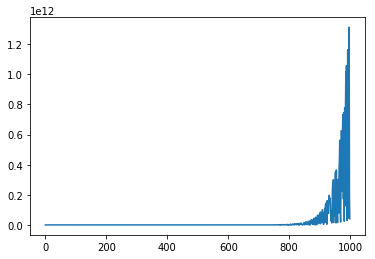

In [33]:
ener_T = []

for i in range(len(xx)):
    ener_T.append((((1/2)*(m+M)*vxx[i]*vxx[i])+(l*m*vxx[i]*vww[i]*cos(ww[i]))+((1/2)*m*l*vww[i]*vww[i])+(m*l*cos(ww[i])*g)))

plt.plot(ener_T)
plt.show()

### Energia Potencial

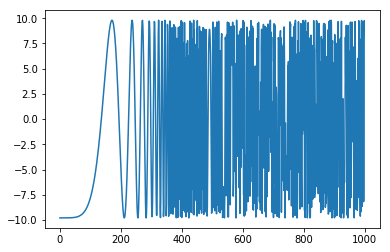

In [34]:
ener_U = []

for i in range(len(xx)):
    ener_U.append((-m*g*l*cos(ww[i])))

plt.plot(ener_U)
plt.show()

### Energia Total

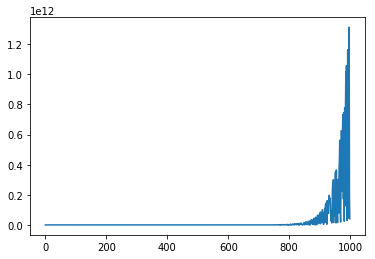

In [35]:
ener_M = []

for i in range(len(xx)):
    ener_M.append(((((1/2)*(m+M)*vxx[i]*vxx[i])+(l*m*vxx[i]*vww[i]*cos(ww[i]))+((1/2)*m*l*vww[i]*vww[i])+(m*l*cos(ww[i])*g)))+(-m*g*l*cos(ww[i])))

plt.plot(ener_M)
plt.show()